##### **EEG Data Analysis**
##### --------------------------------
##### In this notebook, we will explore the fundamental steps of EEG signal processing.
##### We will use the MNE-Python library to load, visualize, filter, and analyze EEG data.
##### Additionally, we will remove artifacts using Independent Component Analysis (ICA)
##### and examine the Power Spectral Density (PSD) to understand the frequency composition of EEG signals.
##### Finally, we will generate a synthetic EEG signal and analyze its spectral properties.
#####
##### **What is EEG?**
##### Electroencephalography (EEG) is a technique for measuring electrical activity in the brain using electrodes placed on the scalp.
##### It is used to diagnose neurological disorders, study brain function, and analyze states of consciousness.
##### 
##### **Gradiometers and Magnetometers**
##### In addition to EEG electrodes, some studies use magnetoencephalography (MEG), which captures the brain's magnetic fields.
##### - **Magnetometers** measure these fields directly.
##### - **Gradiometers** detect variations in the magnetic field while reducing external noise.
##### These sensors are particularly useful for accurately localizing brain activity.

##### First we import the necessary Python package

In [7]:
import mne
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

##### --- **Step 1: Downloading the EEG Dataset** ---
##### We'll use the MNE library to download a sample EEG dataset.
##### The sample dataset is a small, easy-to-use dataset for testing and learning purposes.

In [2]:
sample_data_path = mne.datasets.sample.data_path()
sample_data_file = str(sample_data_path / 'MEG/sample/sample_audvis_raw.fif')

##### --- **Step 2: Loading and Visualizing the Data** ---
##### Load the dataset using MNE

Opening raw data file /home/anat/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 20

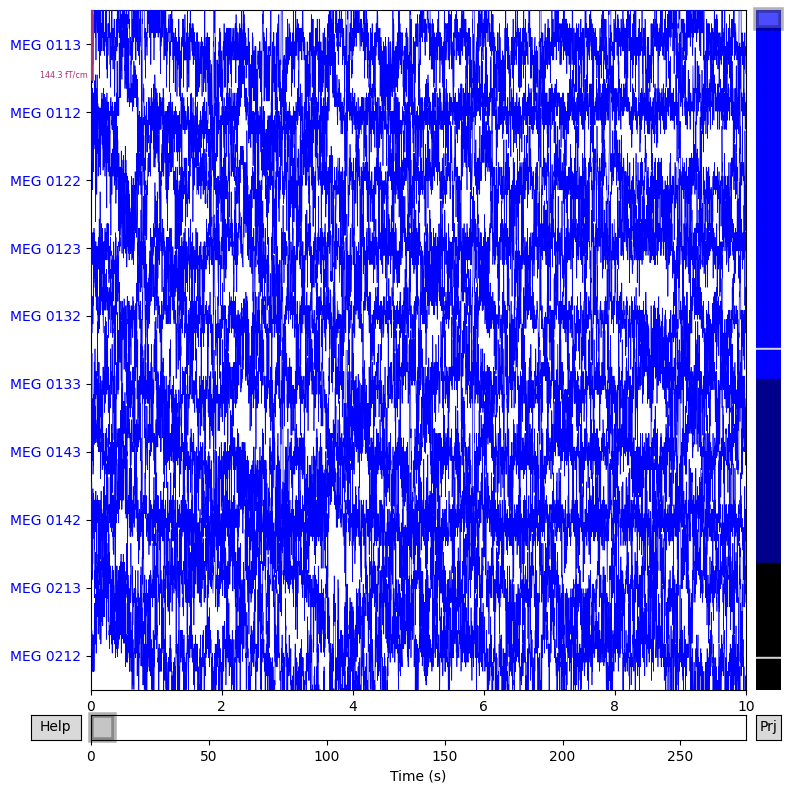

In [3]:
raw = mne.io.read_raw_fif(sample_data_file, preload=True)
print(raw.info)  # Display metadata about the EEG recording
# **Interpreting Metadata**
# - `sfreq`: Sampling frequency
# - `nchan`: Number of channels
# - `ch_names`: Electrode names
# This information helps understand the structure of the EEG data.

##### Plot the raw EEG data (first 10 channels, 10 seconds duration)


In [ ]:
raw.plot(n_channels=10, duration=10, start=0, scalings='auto')
plt.show()

# **How to Interpret These Graphs?**
# Each line represents the electrical activity recorded by an electrode. 
# Fluctuations indicate underlying neuronal activity. 
# Abnormal peaks may reveal artifacts or neurological anomalies.

##### --- **Step 3: Performing Basic Analysis** ---
##### Plot the power spectral density (PSD) to observe frequency content
##### PSD (Power Spectral Density) is used to represent the distribution of power across different frequency components of the signal.
##### This helps identify dominant rhythms in EEG data, such as alpha (8-12 Hz) and beta (13-30 Hz) waves.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)


/home/anat/anaconda3/envs/AI/lib/python3.10/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


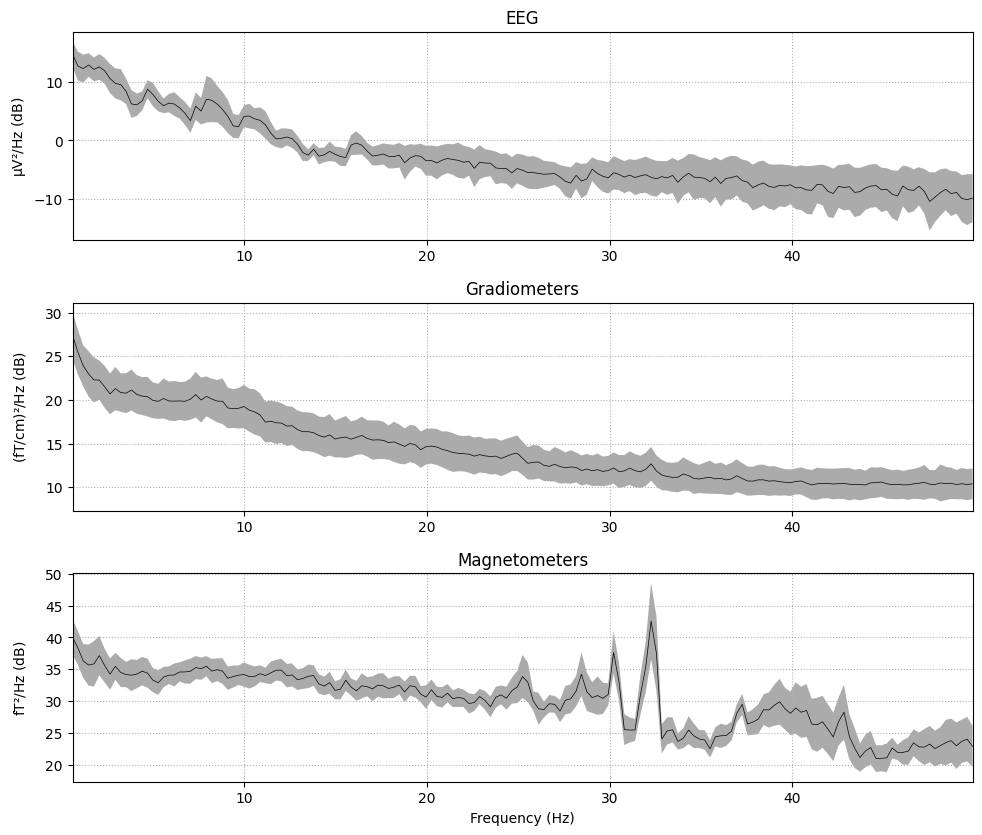

In [4]:
raw.plot_psd(fmin=0.5, fmax=50, tmin=0, tmax=60, average=True)
plt.show()

# **Interpreting the PSD**
# - A peak in the alpha band (8-12 Hz) is associated with a relaxed, wakeful state.
# - Beta activity (13-30 Hz) is linked to active cognitive processes.
# - Excessive low-frequency power may indicate noise or artifacts.

##### --- **Step 4: Filtering the EEG Data** ---
##### Filter the data to remove low-frequency drift and high-frequency noise
##### Applying a bandpass filter (1-40 Hz) to retain relevant EEG frequencies
##### Filtering is essential because EEG signals contain noise and unwanted frequency components (e.g., muscle artifacts, environmental noise).


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1983 samples (3.302 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 366 out of 366 | elapsed:    1.0s finished


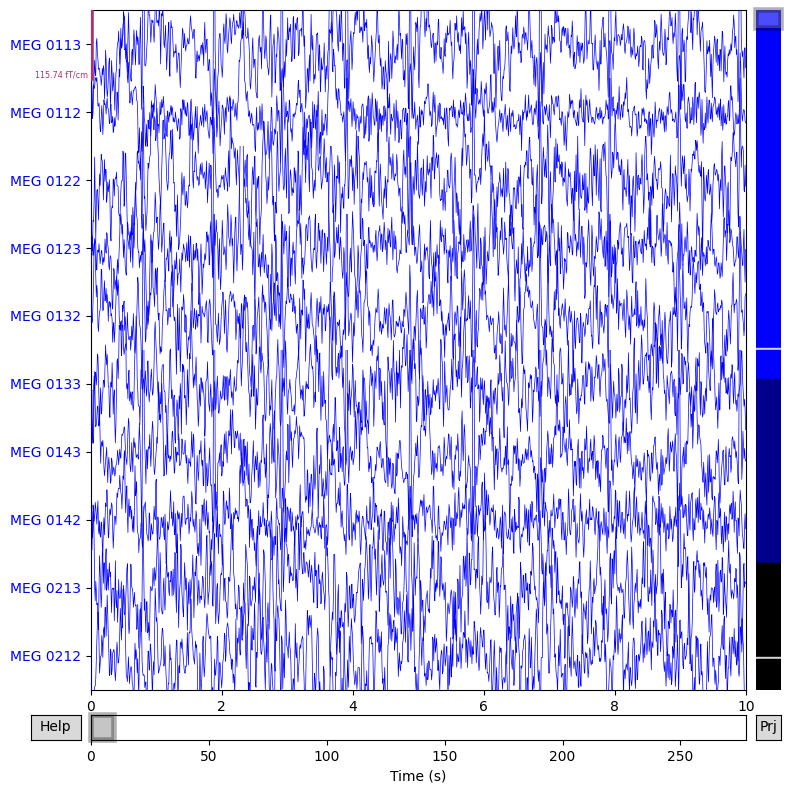

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)


/home/anat/anaconda3/envs/AI/lib/python3.10/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


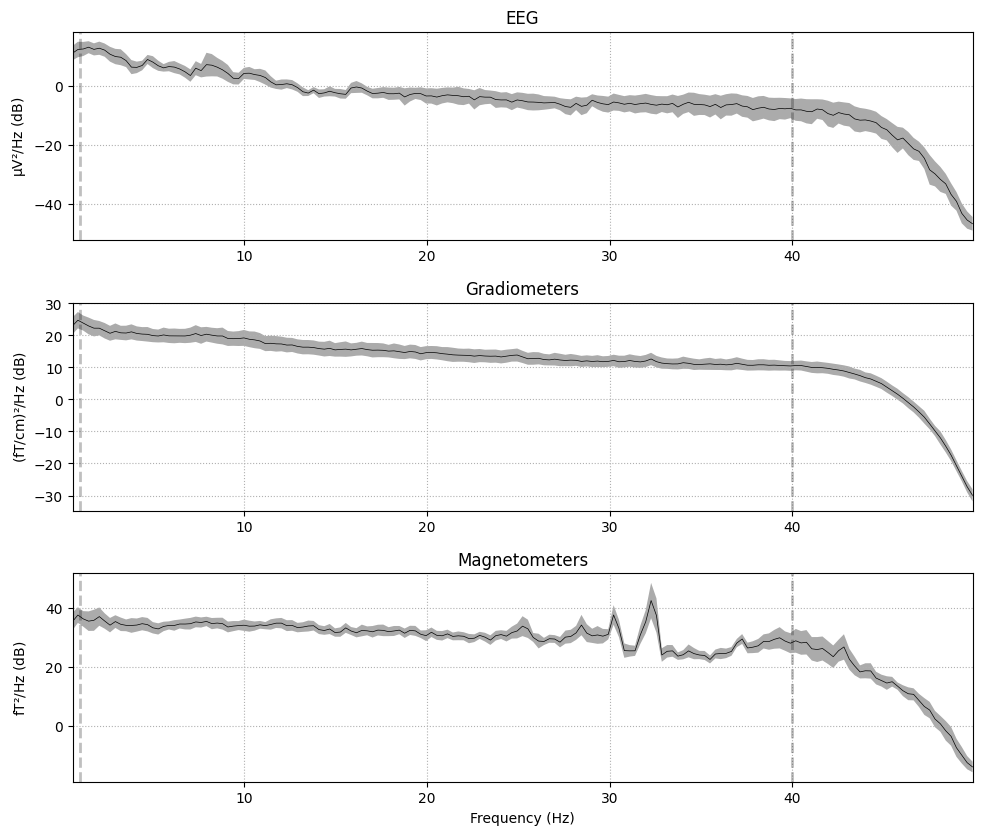

In [5]:
raw.filter(1., 40., fir_design='firwin')

# Plot the filtered data
raw.plot(n_channels=10, duration=10, start=0, scalings='auto')
plt.show()

# Plot the PSD of the filtered data
raw.plot_psd(fmin=0.5, fmax=50, tmin=0, tmax=60, average=True)
plt.show()

##### --- **Step 5: Artifact Removal using ICA** ---
##### Perform ICA (Independent Component Analysis) to identify and remove artifacts
##### ICA is a computational method used to separate a multichannel signal into independent components.
#####  ICA helps extract independent sources from the signal, making it easier to eliminate artifacts such as: eye blinks, muscle movements, and electrical noise from EEG data.

In [ ]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97)
ica.fit(raw)

##### Display ICA components to identify artifacts
##### Components corresponding to artifacts can be identified by their topographical maps and time courses.


In [ ]:
ica.plot_components()


##### Manual inspection and selection of components to remove

In [ ]:
ica.plot_properties(raw, picks=[0, 1])


In [ ]:
# Exclude identified artifact components (manually identified)
# Removing these components improves the signal quality by reducing noise and unwanted sources.

ica.exclude = [0]  # Example: Modify based on inspection
ica.apply(raw)

# Display cleaned data
raw.plot(n_channels=10, duration=10, start=0, scalings='auto')
plt.show()

##### --- **Step 6: Simulated EEG Signal and PSD Calculation** ---
##### Create a synthetic EEG signal (sine wave + white noise) for demonstration
##### Simulated EEG signals are useful for understanding signal processing techniques before applying them to real data.


In [ ]:
fs = 256  # Sampling frequency (Hz)
t = np.linspace(0, 10, fs * 10, endpoint=False)  # 10-second signal
eeg_signal = np.sin(2 * np.pi * 10 * t) + 0.5 * np.random.randn(len(t))  # 10 Hz wave + noise

# Compute the Power Spectral Density (PSD) using Welch's method
# Welch's method estimates PSD by dividing the signal into overlapping segments, computing FFT on each, and averaging the results.
# This reduces noise and provides a smoother estimate of frequency power.
frequencies, psd = welch(eeg_signal, fs, nperseg=1024)

# Plot the PSD
plt.figure()
plt.semilogy(frequencies, psd)
plt.title("Power Spectral Density (PSD)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (dB/Hz)")
plt.show()
